<a href="https://colab.research.google.com/github/AmmirrulAmran/A-Tea-Shop-Website/blob/main/Relationship_Between_GDP_and_Life_Expectancy_Across_Countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [3]:
gdp = pd.read_csv("/content/drive/MyDrive/Life expectancy and GDP relationship/gdp.csv" , index_col = "Country Name")
gdp_per_cap = pd.read_csv("/content/drive/MyDrive/Life expectancy and GDP relationship/gdp_per_capita.csv" , index_col = "Country Name")
life_exp = pd.read_csv("/content/drive/MyDrive/Life expectancy and GDP relationship/Life Expectancy.csv" , index_col = "Entity")
gdp_per_cap_growth = pd.read_csv("/content/drive/MyDrive/Life expectancy and GDP relationship/gdp_per_capita_growth.csv" , index_col = "Country Name")


print(gdp.head())
print(gdp_per_cap.head())

                            Code          1960          1961          1962  \
Country Name                                                                 
Aruba                        ABW           NaN           NaN           NaN   
Africa Eastern and Southern  AFE  1.931311e+10  1.972349e+10  2.149392e+10   
Afghanistan                  AFG  5.377778e+08  5.488889e+08  5.466667e+08   
Africa Western and Central   AFW  1.040428e+10  1.112805e+10  1.194335e+10   
Angola                       AGO           NaN           NaN           NaN   

                                     1963          1964          1965  \
Country Name                                                            
Aruba                                 NaN           NaN           NaN   
Africa Eastern and Southern  2.573321e+10  2.352744e+10  2.681057e+10   
Afghanistan                  7.511112e+08  8.000000e+08  1.006667e+09   
Africa Western and Central   1.267652e+10  1.383858e+10  1.486247e+10   
Angola         

In [4]:
#Clean & prepare Dataframe(remove missing gdp values)

###Array of modern countries as stated by World Bank

import numpy as np

countries = np.array([
    "Afghanistan","Albania","Algeria","American Samoa","Andorra","Angola",
    "Antigua and Barbuda","Argentina","Armenia","Aruba","Australia","Austria","Azerbaijan",

    "Bahamas, The","Bahrain","Bangladesh","Barbados","Belarus","Belgium","Belize",
    "Benin","Bermuda","Bhutan","Bolivia","Bosnia and Herzegovina","Botswana",
    "Brazil","British Virgin Islands","Brunei Darussalam","Bulgaria","Burkina Faso","Burundi",

    "Cabo Verde","Cambodia","Cameroon","Canada","Cayman Islands",
    "Central African Republic","Chad","Channel Islands","Chile","China","Colombia",
    "Comoros","Congo, Dem. Rep.","Congo, Rep.","Costa Rica","Cote d'Ivoire",
    "Croatia","Cuba","Curacao","Cyprus","Czechia",

    "Denmark","Djibouti","Dominica","Dominican Republic",

    "Ecuador","Egypt, Arab Rep.","El Salvador","Equatorial Guinea","Eritrea",
    "Estonia","Eswatini","Ethiopia",

    "Faroe Islands","Fiji","Finland","France","French Polynesia",

    "Gabon","Gambia, The","Georgia","Germany","Ghana","Gibraltar","Greece",
    "Greenland","Grenada","Guam","Guatemala","Guinea","Guinea-Bissau","Guyana",

    "Haiti","Honduras","Hong Kong SAR, China","Hungary",

    "Iceland","India","Indonesia","Iran, Islamic Rep.","Iraq","Ireland",
    "Isle of Man","Israel","Italy",

    "Jamaica","Japan","Jordan",

    "Kazakhstan","Kenya","Kiribati","Korea, Dem. People's Rep.","Korea, Rep.",
    "Kosovo","Kuwait","Kyrgyz Republic",

    "Lao PDR","Latvia","Lebanon","Lesotho","Liberia","Libya","Liechtenstein",
    "Lithuania","Luxembourg",

    "Macao SAR, China","Madagascar","Malawi","Malaysia","Maldives","Mali","Malta",
    "Marshall Islands","Mauritania","Mauritius","Mexico","Micronesia, Fed. Sts.",
    "Moldova","Monaco","Mongolia","Montenegro","Morocco","Mozambique","Myanmar",

    "Namibia","Nauru","Nepal","Netherlands","New Caledonia","New Zealand",
    "Nicaragua","Niger","Nigeria","North Macedonia","Northern Mariana Islands","Norway",

    "Oman",

    "Pakistan","Palau","Panama","Papua New Guinea","Paraguay","Peru",
    "Philippines","Poland","Portugal","Puerto Rico (US)",

    "Qatar",

    "Romania","Russian Federation","Rwanda",

    "Samoa","San Marino","Sao Tome and Principe","Saudi Arabia","Senegal","Serbia",
    "Seychelles","Sierra Leone","Singapore","Sint Maarten (Dutch part)",
    "Slovak Republic","Slovenia","Solomon Islands","Somalia, Fed. Rep.","South Africa",
    "South Sudan","Spain","Sri Lanka","St. Kitts and Nevis","St. Lucia",
    "St. Martin (French part)","St. Vincent and the Grenadines",
    "Sudan","Suriname","Sweden","Switzerland","Syrian Arab Republic",

    "Tajikistan","Tanzania","Thailand","Timor-Leste","Togo","Tonga",
    "Trinidad and Tobago","Tunisia","Turkiye","Turkmenistan",
    "Turks and Caicos Islands","Tuvalu",

    "Uganda","Ukraine","United Arab Emirates","United Kingdom","United States",
    "Uruguay","Uzbekistan",

    "Vanuatu","Venezuela, RB","Viet Nam","Virgin Islands (U.S.)",

    "West Bank and Gaza",

    "Yemen, Rep.",

    "Zambia","Zimbabwe"
])

######################################################################################

# Cleaning GDP DF

# Remove Regions and keeping only modern recognized countries in the DF
# Remove Rows with missing gdp values with more than 50 columns
# Round to 4 decimal places in Billion


#print(gdp.isna().sum())
gdp.dropna(thresh = 50)
gdp.fillna(0)

gdp = gdp[gdp.index.isin(countries)]


# Cleaning GDP_PER_CAP_GROWTH DF

# Remove Regions and keeping only modern recognized countries in the DF
# Remove Rows with missing gdp values with more than 50 columns
# Round to 4 decimal places in Billion


#print(gdp.isna().sum())
gdp_per_cap_growth.dropna(thresh = 50)
gdp_per_cap_growth.fillna(0)

gdp_per_cap_growth = gdp_per_cap_growth[gdp_per_cap_growth.index.isin(countries)]


######################################################################################

# Cleaning GDP_PER_CAP DF

# Remove Regions and keeping only modern recognized countries in the DF
# Remove Rows with missing gdp values with more than 50 columns
# Round to 4 decimal places in Billion



#print(gdp_per_cap.isna().sum())
gdp_per_cap.dropna(thresh = 50)
gdp_per_cap.fillna(0)

gdp_per_cap = gdp_per_cap[gdp_per_cap.index.isin(countries)]
#gdp_per_cap.iloc[:, [1,61]] = (gdp_per_cap.iloc[:, [1,61]] / 1_000_000_000).round(4)


###########################################################

#Reshape  gdp,gdp_per_cap_growth and gdp_per_cap df with melt


gdp = gdp.reset_index()

gdp = gdp.melt(id_vars=['Country Name', 'Code'],
var_name='Year', value_name='GDP(Billion)')

##########################################################

gdp_per_cap = gdp_per_cap.reset_index()

gdp_per_cap = gdp_per_cap.melt(id_vars=['Country Name', 'Code'],
var_name='Year', value_name='GDP(Billion)')

################################################################

gdp_per_cap_growth = gdp_per_cap_growth.reset_index()

gdp_per_cap_growth = gdp_per_cap_growth.melt(id_vars=['Country Name', 'Code'],
var_name='Year', value_name='GDP(Growth %)')

################################################################


# Sort by Country Name and Year
gdp = gdp.sort_values(by=['Country Name', 'Year']).reset_index(drop=True)
gdp_per_cap = gdp_per_cap.sort_values(by=['Country Name', 'Year']).reset_index(drop=True)
gdp_per_cap_growth = gdp_per_cap_growth.sort_values(by=['Country Name', 'Year']).reset_index(drop=True)


In [5]:
###############################################################
#Merging GDP/GDP PER CAP and Life Expectancy


##########So rows for the GDP value has a non numerical value, Removing it############

# Ensure 'Year' column is string type before applying .str accessor
gdp.loc[:, "Year"] = gdp["Year"].astype(str)
gdp = gdp[gdp["Year"].str.isnumeric()]

# The life_exp Year column was already checked in a previous step, and should be numeric

# Ensure 'Year' column is string type before applying .str accessor
gdp_per_cap.loc[:, "Year"] = gdp_per_cap["Year"].astype(str)
gdp_per_cap = gdp_per_cap[gdp_per_cap["Year"].str.isnumeric()]


# Ensure 'Year' column is string type before applying .str accessor
gdp_per_cap_growth.loc[:, "Year"] = gdp_per_cap_growth["Year"].astype(str)
gdp_per_cap_growth = gdp_per_cap_growth[gdp_per_cap_growth["Year"].str.isnumeric()]

# Now convert to int
gdp.loc[:, "Year"] = gdp["Year"].astype(int)
life_exp.loc[:, "Year"] = life_exp["Year"].astype(int)
gdp_per_cap.loc[:, "Year"] = gdp_per_cap["Year"].astype(int)
gdp_per_cap_growth.loc[:, "Year"] = gdp_per_cap_growth["Year"].astype(int)

gdp_life_expec = gdp.merge(life_exp, left_on=['Country Name', 'Code','Year'], right_on=['Entity','Code', 'Year'])
gdp_perCap_life_expec = gdp_per_cap.merge(life_exp, left_on=['Country Name', 'Code', 'Year'], right_on=['Entity','Code', 'Year'])
gdp_perCapGrowth_life_expec = gdp_per_cap_growth.merge(life_exp, left_on=['Country Name', 'Code', 'Year'], right_on=['Entity','Code', 'Year'])


#Rename the super long life expectancy column

gdp_life_expec = gdp_life_expec.rename(columns={'Period life expectancy at birth - Sex: total - Age: 0': 'Life Expectancy'})
gdp_perCap_life_expec = gdp_perCap_life_expec.rename(columns={'Period life expectancy at birth - Sex: total - Age: 0': 'Life Expectancy'})
gdp_perCapGrowth_life_expec = gdp_perCapGrowth_life_expec.rename(columns={'Period life expectancy at birth - Sex: total - Age: 0': 'Life Expectancy'})

#####Log the GDP due to skewness########
gdp_life_expec['log_GDP'] = np.log(gdp_life_expec['GDP(Billion)'])
gdp_perCap_life_expec['log_GDP_per_capita'] = np.log(gdp_perCap_life_expec['GDP(Billion)'])
gdp_perCapGrowth_life_expec['log_GDP_per_capita'] = np.log(gdp_perCapGrowth_life_expec['GDP(Growth %)'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:





print(gdp_life_expec.head(100))
print("---------------------------")
print(gdp_perCap_life_expec.head(20))


   Country Name Code  Year  GDP(Billion)  Life Expectancy    log_GDP
0   Afghanistan  AFG  1960  5.377778e+08          32.7987  20.102956
1   Afghanistan  AFG  1961  5.488889e+08          33.2910  20.123407
2   Afghanistan  AFG  1962  5.466667e+08          33.7565  20.119350
3   Afghanistan  AFG  1963  7.511112e+08          34.2008  20.437064
4   Afghanistan  AFG  1964  8.000000e+08          34.6726  20.500122
..          ...  ...   ...           ...              ...        ...
95      Albania  ALB  1994  1.880952e+09          73.8367  21.355044
96      Albania  ALB  1995  2.392765e+09          74.0218  21.595715
97      Albania  ALB  1996  3.199641e+09          74.1134  21.886305
98      Albania  ALB  1997  2.258514e+09          73.3832  21.537973
99      Albania  ALB  1998  2.545965e+09          74.3572  21.657775

[100 rows x 6 columns]
---------------------------
   Country Name Code  Year  GDP(Billion)  Life Expectancy  log_GDP_per_capita
0   Afghanistan  AFG  1960     59.773234  

In [7]:
# -----------------------------
# 1. Descriptive Statistics
# -----------------------------



print(gdp_life_expec.describe())
print('----------------')

print(gdp_perCap_life_expec.describe())

       GDP(Billion)  Life Expectancy      log_GDP
count  8.720000e+03     11163.000000  8720.000000
mean   1.929114e+11        64.782765    22.922408
std    1.023479e+12        11.369392     2.521534
min    8.824448e+06        10.989100    15.993037
25%    1.459505e+09        57.684850    21.101363
50%    7.623970e+09        67.386600    22.754563
75%    5.051507e+10        73.302400    24.645538
max    2.143320e+13        86.150700    30.695962
----------------
        GDP(Billion)  Life Expectancy  log_GDP_per_capita
count    8717.000000     11163.000000         8717.000000
mean     9107.847898        64.782765            7.690033
std     18131.195562        11.369392            1.787786
min        12.802812        10.989100            2.549665
25%       546.951061        57.684850            6.304359
50%      1955.588006        67.386600            7.578446
75%      8395.318770        73.302400            9.035430
max    189487.147100        86.150700           12.152076


In [8]:
# -----------------------------
# 2. Check for skewness
# -----------------------------

print("\nSkewness:")
print("GDP skew:", gdp_life_expec['GDP(Billion)'].skew())
print("GDP per Capita skew:", gdp_perCap_life_expec['GDP(Billion)'].skew())
print("Life Expectancy skew:", gdp_life_expec['Life Expectancy'].skew())
gdp_life_expec.to_excel("gdp_life_expectancy.xlsx", index=False)




Skewness:
GDP skew: 12.172785230639033
GDP per Capita skew: 4.137248218337949
Life Expectancy skew: -0.7095069179100215


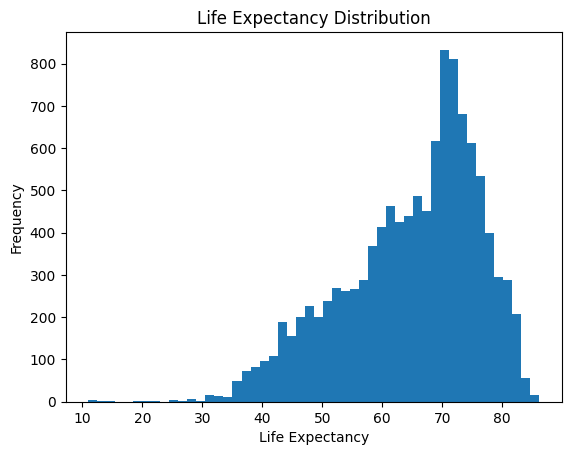

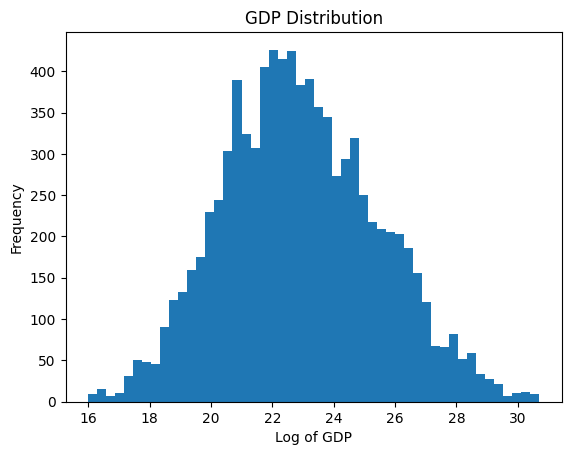

In [9]:
# -----------------------------
# 3. Histograms / Distributions
# ----------------------------
plt.hist(gdp_life_expec['Life Expectancy'], bins = 50)
plt.title("Life Expectancy Distribution")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()
plt.hist(gdp_life_expec['log_GDP'], bins = 50)
plt.title("GDP Distribution")
plt.xlabel("Log of GDP")
plt.ylabel("Frequency")
plt.show()






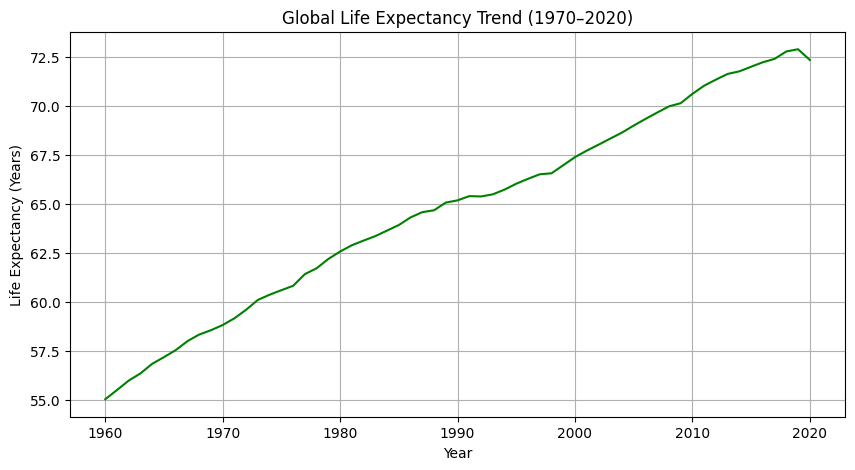

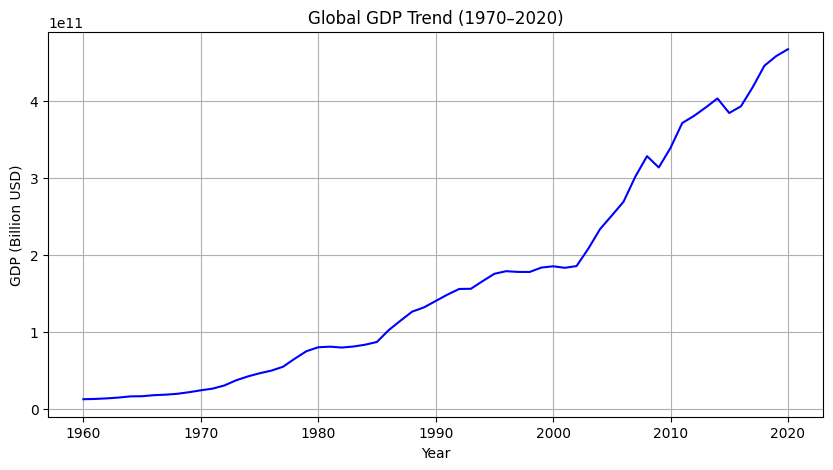

In [10]:
avg_gdp_lifeExpex_Globally = gdp_life_expec.groupby('Year')[['Life Expectancy', 'GDP(Billion)']].mean()
# Plot Life Expectancy
avg_gdp_lifeExpex_Globally['Life Expectancy'].plot(figsize=(10,5), color='green')
plt.title("Global Life Expectancy Trend (1970–2020)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.grid(True)
plt.show()

# Plot GDP
avg_gdp_lifeExpex_Globally['GDP(Billion)'].plot(figsize=(10,5), color='blue')
plt.title("Global GDP Trend (1970–2020)")
plt.xlabel("Year")
plt.ylabel("GDP (Billion USD)")
plt.grid(True)
plt.show()

In [11]:
##Correlation Analysis between GDP and Life expectancy

print(avg_gdp_lifeExpex_Globally[['Life Expectancy', 'GDP(Billion)']].corr())

                 Life Expectancy  GDP(Billion)
Life Expectancy         1.000000      0.946389
GDP(Billion)            0.946389      1.000000


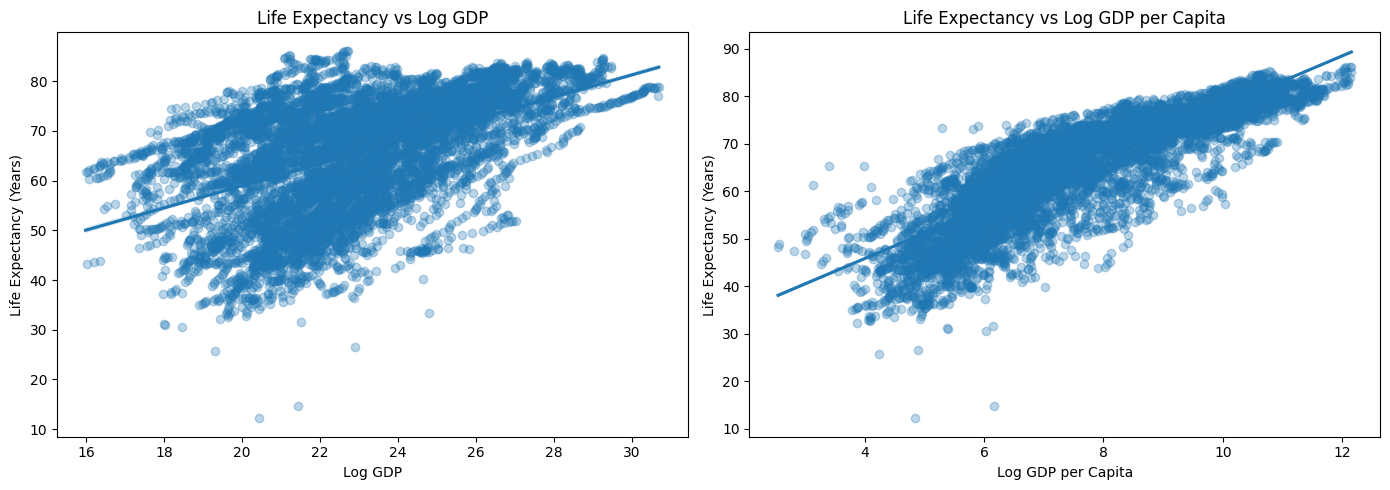

Correlation with log GDP: 0.5031590281536774
Correlation with log GDP per capita: 0.8528817937558686


In [12]:
###Correlation Analysis between GDP/GDP_per_capita and Life expectancy


corr_gdp_life_expec = gdp_life_expec['Life Expectancy'].corr(gdp_life_expec['log_GDP'])
corr_gdpPerCap_life_expec = gdp_perCap_life_expec['Life Expectancy'].corr(gdp_perCap_life_expec['log_GDP_per_capita'])

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot 1: Life Expectancy vs log GDP
sns.regplot(
    data=gdp_life_expec,
    x='log_GDP',
    y='Life Expectancy',
    scatter_kws={'alpha':0.3},
    ax=axes[0]
)
axes[0].set_title("Life Expectancy vs Log GDP")
axes[0].set_xlabel("Log GDP")
axes[0].set_ylabel("Life Expectancy (Years)")

# Plot 2: Life Expectancy vs log GDP per capita
sns.regplot(
    data=gdp_perCap_life_expec,
    x='log_GDP_per_capita',
    y='Life Expectancy',
    scatter_kws={'alpha':0.3},
    ax=axes[1]
)
axes[1].set_title("Life Expectancy vs Log GDP per Capita")
axes[1].set_xlabel("Log GDP per Capita")
axes[1].set_ylabel("Life Expectancy (Years)")

plt.tight_layout()
plt.show()


print("Correlation with log GDP:", corr_gdp_life_expec)
print("Correlation with log GDP per capita:", corr_gdpPerCap_life_expec)

Countries with consistently low life expectancy (1960–2020):
['Mali', 'Niger', 'Sierra Leone', 'South Sudan']
Countries with consistently high life expectancy (1960–2020):
['Andorra', 'Iceland', 'Japan', 'Liechtenstein', 'Monaco', 'Norway', 'San Marino', 'Sweden', 'Switzerland']
Low countries year counts:
Country Name
Mali            61
Niger           61
Sierra Leone    61
South Sudan     61
Name: count, dtype: int64
High countries year counts:
Country Name
Andorra          61
Iceland          61
Japan            61
Liechtenstein    61
Monaco           61
Norway           61
San Marino       61
Sweden           61
Switzerland      61
Name: count, dtype: int64


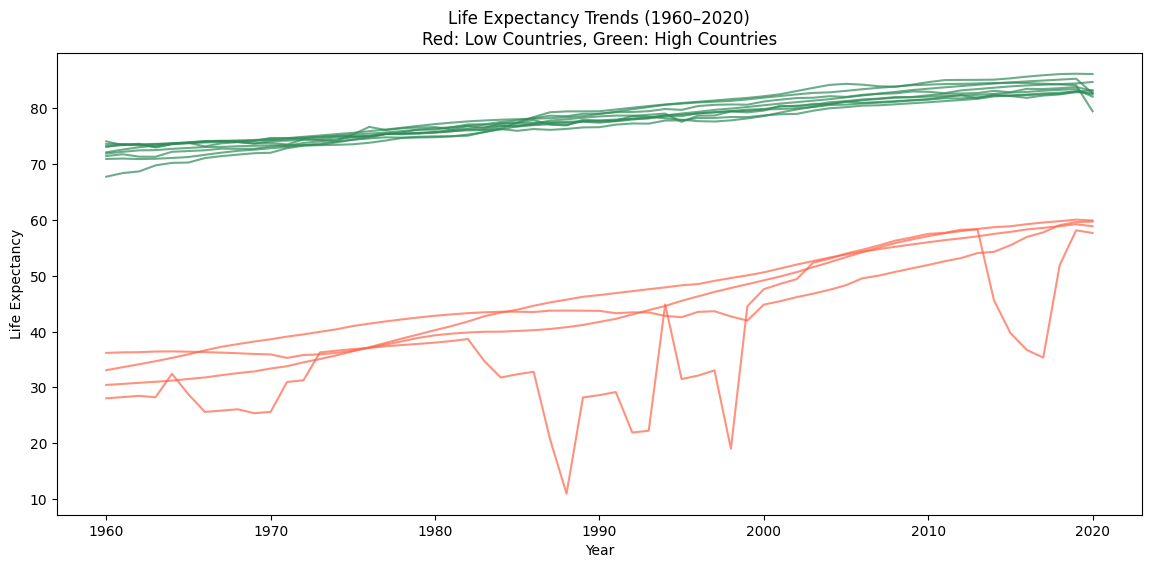

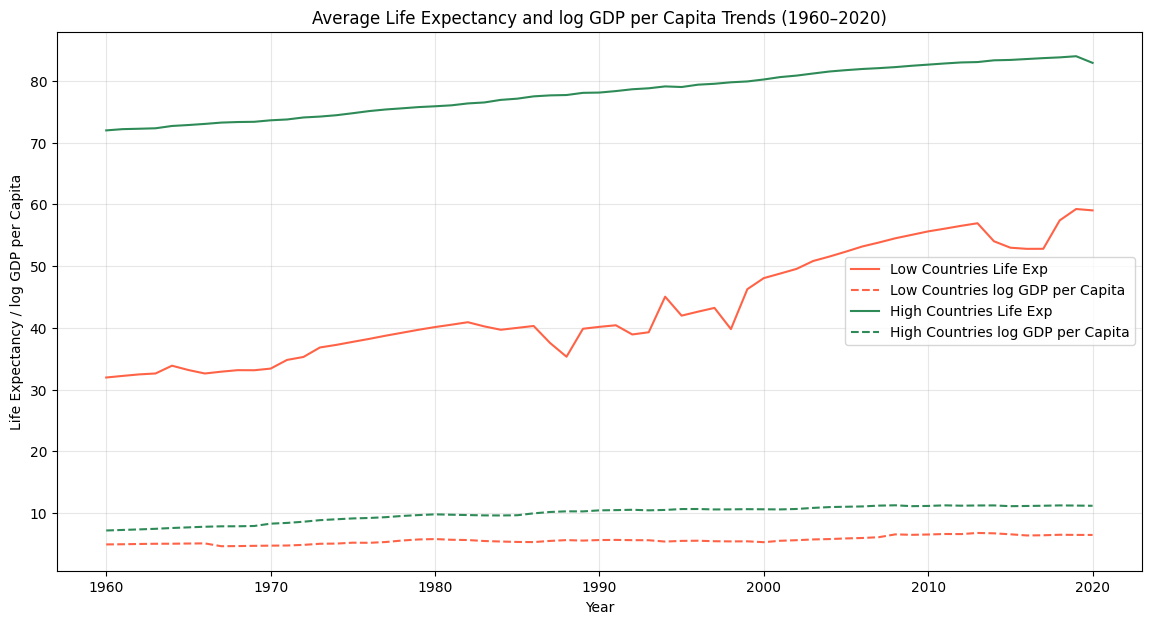

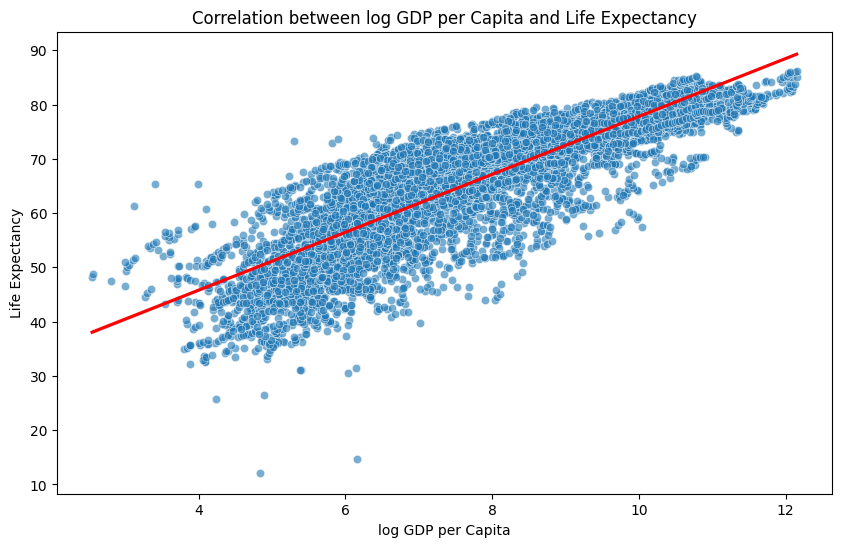

In [39]:

country_avg_life = gdp_perCap_life_expec.groupby('Country Name')['Life Expectancy'].mean().reset_index()
z_scores = stats.zscore(country_avg_life['Life Expectancy'])
country_avg_life['z_score'] = z_scores

low_countries = country_avg_life[country_avg_life['z_score'] < -2]['Country Name'].tolist()
print("Countries with consistently low life expectancy (1960–2020):")
print(low_countries)

high_countries = country_avg_life[country_avg_life['z_score'] > 1.3]['Country Name'].tolist()
print("Countries with consistently high life expectancy (1960–2020):")
print(high_countries)

low_outliers = gdp_perCap_life_expec[gdp_perCap_life_expec['Country Name'].isin(low_countries)]
high_outliers = gdp_perCap_life_expec[gdp_perCap_life_expec['Country Name'].isin(high_countries)]

print("Low countries year counts:")
print(low_outliers['Country Name'].value_counts())
print("High countries year counts:")
print(high_outliers['Country Name'].value_counts())


plt.figure(figsize=(14,6))

for country in low_countries:
    plt.plot(low_outliers[low_outliers['Country Name']==country]['Year'],
             low_outliers[low_outliers['Country Name']==country]['Life Expectancy'],
             color='tomato', alpha=0.7)
for country in high_countries:
    plt.plot(high_outliers[high_outliers['Country Name']==country]['Year'],
             high_outliers[high_outliers['Country Name']==country]['Life Expectancy'],
             color='seagreen', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Trends (1960–2020)\nRed: Low Countries, Green: High Countries')
plt.show()



import matplotlib.pyplot as plt

life_col = 'Life Expectancy'
gdp_col = 'log_GDP_per_capita'

# Aggregate averages per year
low_avg = gdp_perCap_life_expec[gdp_perCap_life_expec['Country Name'].isin(low_countries)].groupby('Year')[[life_col, gdp_col]].mean().reset_index()
high_avg = gdp_perCap_life_expec[gdp_perCap_life_expec['Country Name'].isin(high_countries)].groupby('Year')[[life_col, gdp_col]].mean().reset_index()

plt.figure(figsize=(14,7))

# Low countries
plt.plot(low_avg['Year'], low_avg[life_col], color='tomato', linestyle='-', label='Low Countries Life Exp')
plt.plot(low_avg['Year'], low_avg[gdp_col], color='tomato', linestyle='--', label='Low Countries log GDP per Capita')

# High countries
plt.plot(high_avg['Year'], high_avg[life_col], color='seagreen', linestyle='-', label='High Countries Life Exp')
plt.plot(high_avg['Year'], high_avg[gdp_col], color='seagreen', linestyle='--', label='High Countries log GDP per Capita')

plt.xlabel('Year')
plt.ylabel('Life Expectancy / log GDP per Capita')
plt.title('Average Life Expectancy and log GDP per Capita Trends (1960–2020)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x='log_GDP_per_capita', y='Life Expectancy', data=gdp_perCap_life_expec, alpha=0.6)

# Add regression line
sns.regplot(x='log_GDP_per_capita', y='Life Expectancy', data=gdp_perCap_life_expec, scatter=False, color='red')

plt.xlabel('log GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Correlation between log GDP per Capita and Life Expectancy')
plt.show()



Correlation between GDP per capita growth and life expectancy change: 0.5027989668313742


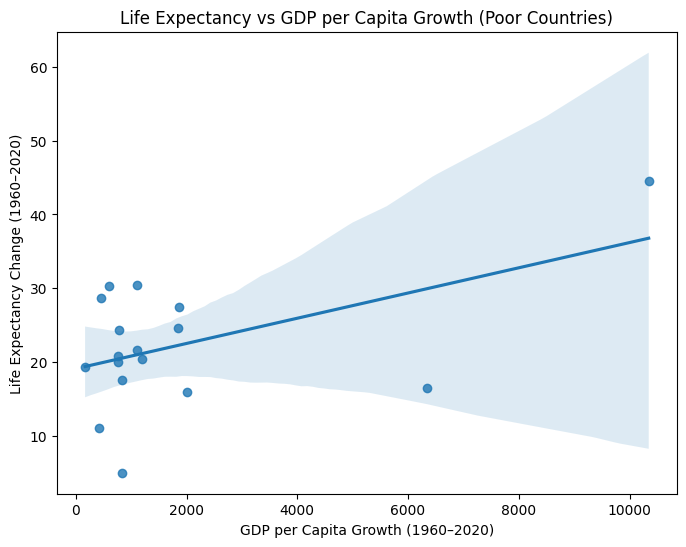

                     Country  Life Expectancy Increase (Years)  \
6                      China                           44.6001   
2                   Botswana                           16.4228   
12                   Nigeria                           15.8657   
1                 Bangladesh                           27.4416   
8                      India                           24.5459   
7                      Haiti                           20.3330   
13                  Pakistan                           21.6002   
11                     Nepal                           30.4547   
15                      Togo                           17.5868   
9                    Lesotho                            4.9615   
3               Burkina Faso                           24.3800   
16                    Uganda                           20.7773   
14                    Rwanda                           19.9316   
10                    Malawi                           30.2297   
0         

In [18]:

# Identify poor countries in 1960
poor_countries = gdp_perCap_life_expec[gdp_perCap_life_expec['Year'] == 1960]
threshold = poor_countries['GDP(Billion)'].quantile(0.2)  # bottom 20%
poor_countries_list = poor_countries[poor_countries['GDP(Billion)'] <= threshold]['Country Name'].tolist()

# Filter dataset for poor countries
poor_df = gdp_perCap_life_expec[gdp_perCap_life_expec['Country Name'].isin(poor_countries_list)]

# Calculate changes from 1960 to 2020
life_exp_change = poor_df.groupby('Country Name')['Life Expectancy'].agg(lambda x: x.iloc[-1] - x.iloc[0])
gdp_perCap_change = poor_df.groupby('Country Name')['GDP(Billion)'].agg(lambda x: x.iloc[-1] - x.iloc[0])

df_change = life_exp_change.to_frame('LifeExp_Change')
df_change['GDPperCap_Change'] = gdp_perCap_change

# Correlation ---
corr = df_change['LifeExp_Change'].corr(df_change['GDPperCap_Change'])
print("Correlation between GDP per capita growth and life expectancy change:", corr)

# Scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x='GDPperCap_Change', y='LifeExp_Change', data=df_change)
plt.xlabel("GDP per Capita Growth (1960–2020)")
plt.ylabel("Life Expectancy Change (1960–2020)")
plt.title("Life Expectancy vs GDP per Capita Growth (Poor Countries)")
plt.show()



results_table = df_change.reset_index()


results_table = results_table.rename(columns={
    'Country Name': 'Country',
    'GDPperCap_Change': 'GDP per Capita Growth (1960–2020)',
    'LifeExp_Change': 'Life Expectancy Increase (Years)'
})


results_table = results_table.sort_values(by='GDP per Capita Growth (1960–2020)', ascending=False)

print(results_table)



Correlation between GDP per capita growth and life expectancy change (Rich Countries): 0.3027235461164173


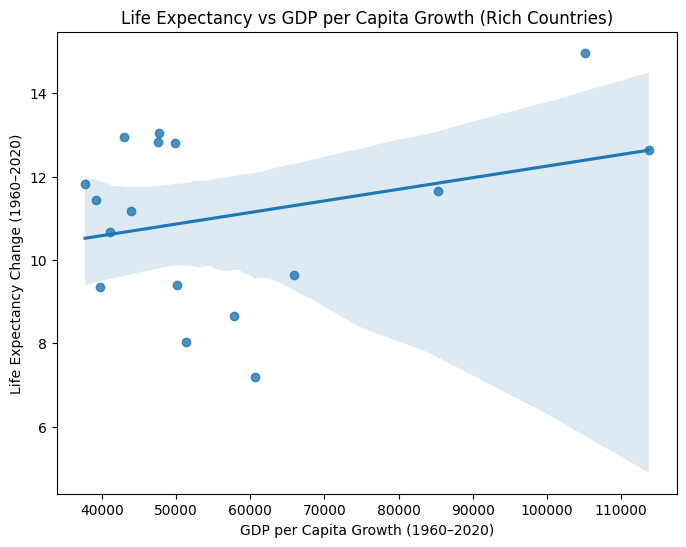

           Country  Life Expectancy Increase (Years)  \
9       Luxembourg                           12.6277   
3          Bermuda                           14.9740   
14     Switzerland                           11.6489   
12          Norway                            9.6314   
16   United States                            7.1822   
7          Iceland                            8.6620   
10     Netherlands                            8.0393   
13          Sweden                            9.3906   
0        Australia                           12.7987   
1          Austria                           13.0569   
5          Finland                           12.8290   
2          Belgium                           11.1740   
8           Israel                           12.9462   
4           Canada                           10.6808   
15  United Kingdom                            9.3603   
11     New Zealand                           11.4393   
6           France                           11.

In [19]:
# Identify rich countries in 1960
rich_countries = gdp_perCap_life_expec[gdp_perCap_life_expec['Year'] == 1960]
threshold_rich = rich_countries['GDP(Billion)'].quantile(0.8)  # top 20%
rich_countries_list = rich_countries[rich_countries['GDP(Billion)'] >= threshold_rich]['Country Name'].tolist()

# Filter dataset for rich countries
rich_df = gdp_perCap_life_expec[gdp_perCap_life_expec['Country Name'].isin(rich_countries_list)]

# Calculate changes from 1960 to 2020
life_exp_change_rich = rich_df.groupby('Country Name')['Life Expectancy'].agg(lambda x: x.iloc[-1] - x.iloc[0])
gdp_perCap_change_rich = rich_df.groupby('Country Name')['GDP(Billion)'].agg(lambda x: x.iloc[-1] - x.iloc[0])

df_change_rich = life_exp_change_rich.to_frame('LifeExp_Change')
df_change_rich['GDPperCap_Change'] = gdp_perCap_change_rich

# Correlation
corr_rich = df_change_rich['LifeExp_Change'].corr(df_change_rich['GDPperCap_Change'])
print("Correlation between GDP per capita growth and life expectancy change (Rich Countries):", corr_rich)

# Scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x='GDPperCap_Change', y='LifeExp_Change', data=df_change_rich)
plt.xlabel("GDP per Capita Growth (1960–2020)")
plt.ylabel("Life Expectancy Change (1960–2020)")
plt.title("Life Expectancy vs GDP per Capita Growth (Rich Countries)")
plt.show()


results_table_rich = df_change_rich.reset_index()


results_table_rich = results_table_rich.rename(columns={
    'Country Name': 'Country',
    'GDPperCap_Change': 'GDP per Capita Growth (1960–2020)',
    'LifeExp_Change': 'Life Expectancy Increase (Years)'
})

results_table_rich = results_table_rich.sort_values(by='GDP per Capita Growth (1960–2020)', ascending=False)

print(results_table_rich)

